# Matplotlib Box Plots Problems

**df.plot(kind = 'box')**

## Statistical Analysis

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst Data
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

### Data Scientist Hourly Salary Box Plot (2.18.1) - Problem

Create a box plot to visualize the distribution of **salary_hour_avg** for Data Scientist job postings in the United States. Label the x-axis as 'Data Scientist' and the y-axis as 'Hourly Salary ($USD)'.

Hint:
Use the DataFrames **plot()** method to create the box plot. Customize the x-axis and y-axis labels using **plt.xlabel()** and **plt.ylabel()**.

In [5]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()
df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])

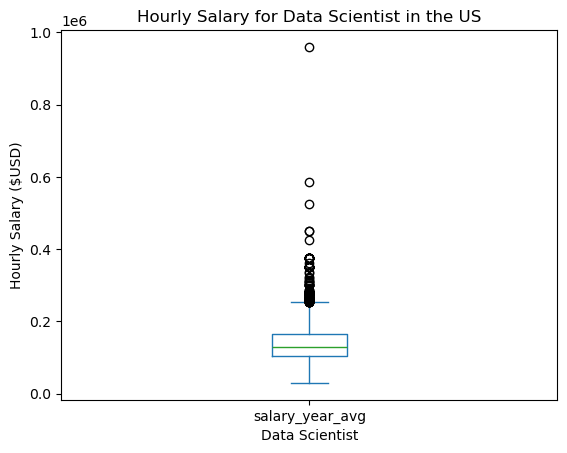

In [10]:
df_DS_US['salary_year_avg'].plot(kind='box')
plt.title('Hourly Salary for Data Scientist in the US')
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.show()

### Comparison of Hourly Salaries for Data Analyst (2.18.2) - Problem

Create a box plot to compare the distribution of **salary_hour_avg** for Data Analyst job postings in the United States and Canada.

Filter a DataFrame to include only 'Data Analyst' roles in these two countries.
Use list comprehension to create a list of DataFrames for each country.
Use the **plt.boxplot()** function to plot this list and specify the **labels** as **countries**.
Set the y-axis limit to 150 and the y-axis as 'Hourly Salary ($USD)'.

Code Needed:
`countries = ['United States', 'Canada']`

Hint:

Use the **plt.boxplot()** function to create the box plot and customize the y-axis labels using **plt.ylabel()**.


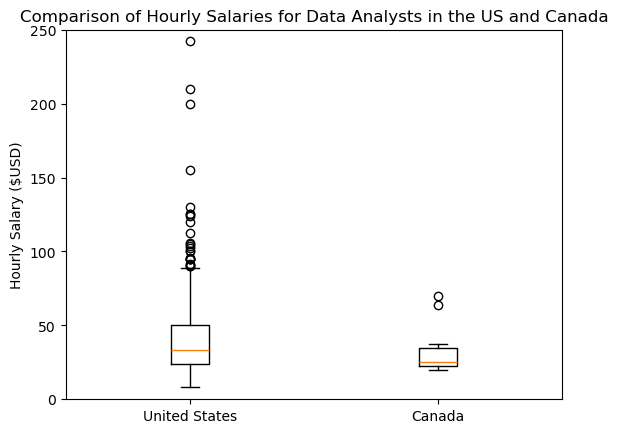

In [ ]:
# Filter Data
countries = ['United States', 'Canada']
df_DA_US_CAN = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')].dropna(subset=['salary_hour_avg'])

# List Comprehension
list_country = [df_DA_US_CAN[df_DA_US_CAN['job_country'] == country]['salary_hour_avg'] for country in countries]

# Plotting
plt.boxplot(list_country, tick_labels=countries)
plt.xlabel('')
plt.ylabel('Hourly Salary ($USD)')
plt.ylim(0, 250) # cut at 250 and remove outlier (optional)
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()


### Comparison of Hourly Salaries in Canada (2.18.3) - Problem


Create a box plot to compare the distribution of **salary_hour_avg** for Data Analyst, Data Engineer, and Data Scientist job postings in Canada.
Label the x-axis as 'Job Title' and format the y-axis to have '$' before the number then label it as 'Hourly Salary (CAD)'.

Code Needed:

`job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']`

Hint:

Create a box plot **using ax.boxplot()** after setting up your figure and axes with **plt.subplots()**.
Customize the x-axis and y-axis labels using **ax.set_xlabel()** and **ax.set_ylabel()**.
Apply a custom formatter to the y-axis to format salary values as currency.

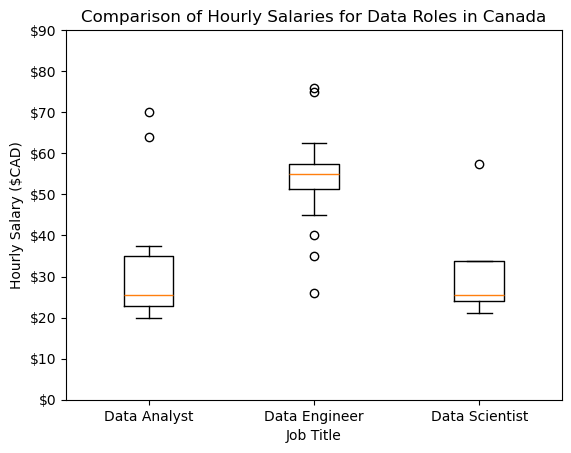

In [ ]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
can_jobs = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Canada')].dropna(subset=['salary_hour_avg'])
# can_jobs.head()

# List Comprehension
list_jobs = [can_jobs[can_jobs['job_title_short'] == job]['salary_hour_avg'] for job in job_titles]

# Plotting

fig, ax = plt.subplots() 
ax.boxplot(list_jobs, tick_labels=job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary ($CAD)')
plt.ylim(0, 90) # cut at 90 and remove outlier (optional)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
ax.set_title('Comparison of Hourly Salaries for Data Roles in Canada')
plt.show()
